In [1]:
import cv2 as cv
import imutils
import os
import matplotlib.pyplot as plt
import numpy as np

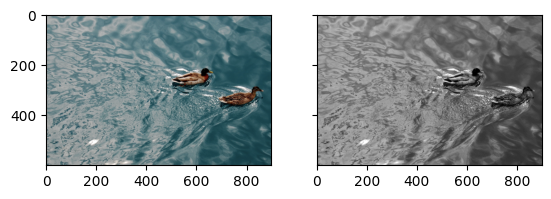

In [191]:
image = cv.imread('imagenes/ejercicios/patos.png')
imgRgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
imgGray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.imshow(imgRgb)
ax2.imshow(imgGray, 'gray')

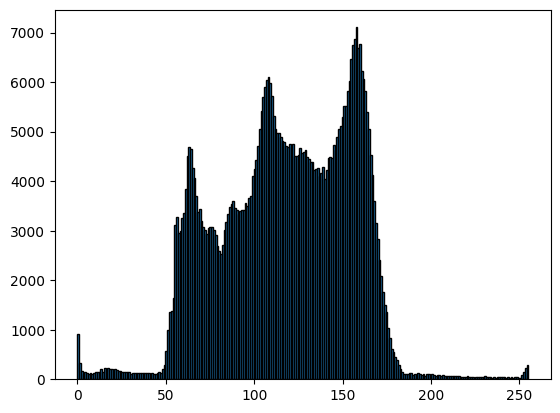

In [190]:
a,b = imgGray.shape
datos = np.reshape(imgGray, a * b)
plt.hist(datos, bins=256, edgecolor = 'black',  linewidth=1)
#plt.hist(h)
plt.show()

In [13]:
def obtenerCanaleColor(image, color):
    a,b,h = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            image_new[i,j] = image[i,j, color]
    return image_new

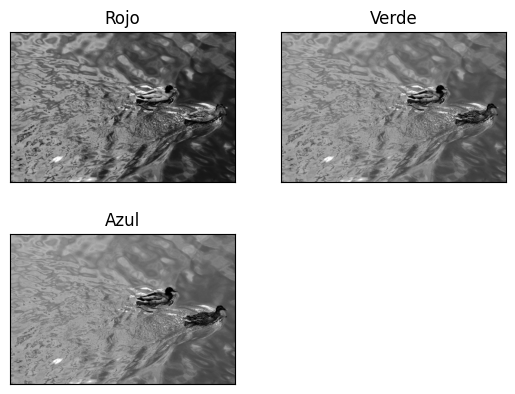

In [192]:
titles = ['Rojo','Verde', 'Azul']
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(obtenerCanaleColor(imgRgb, i),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [152]:
def obtenerImagenColoRojo(image):
    a, b, h = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            red = image[i,j, 0]
            green = image[i,j,1]
            blue = image[i,j,2]
            if red > 110 and green < 90:
                image_new[i,j] = 150
            elif green < 20 and blue < 20:
                image_new[i,j] = 150
    return image_new

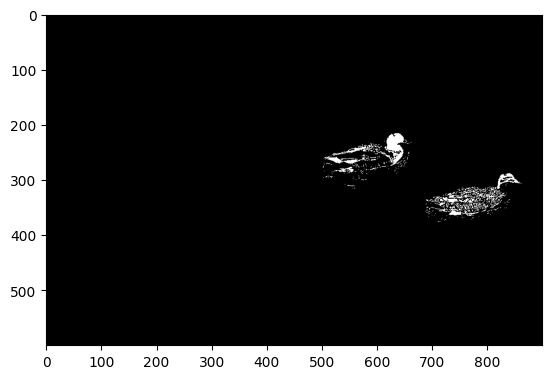

In [153]:
image_red_new = obtenerImagenColoRojo(imgRgb)
image_red_new = np.uint8(image_red_new)
plt.imshow(image_red_new, 'gray')

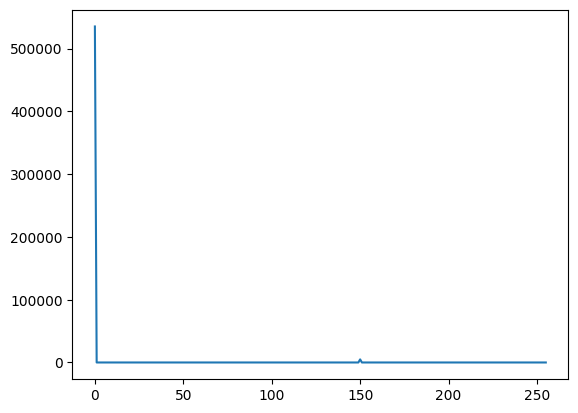

In [154]:
histg = cv.calcHist([image_red_new],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

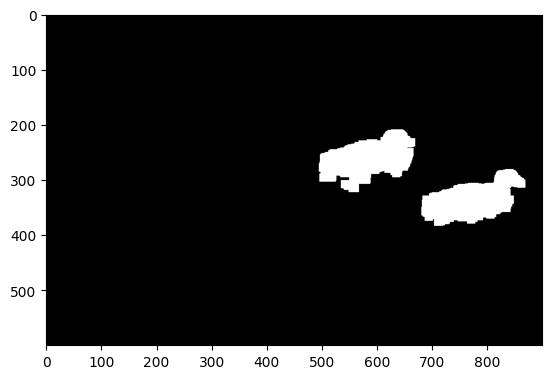

In [159]:
kernel = np.ones((15,15),np.uint8)
dilate = cv.dilate(image_red_new,kernel,iterations = 1)
plt.imshow(dilate, 'gray')

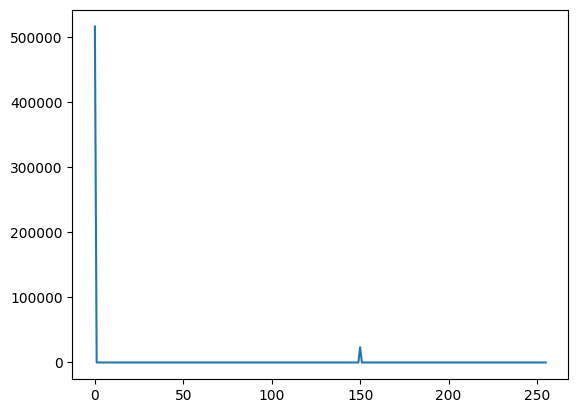

In [160]:
histg = cv.calcHist([dilate],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

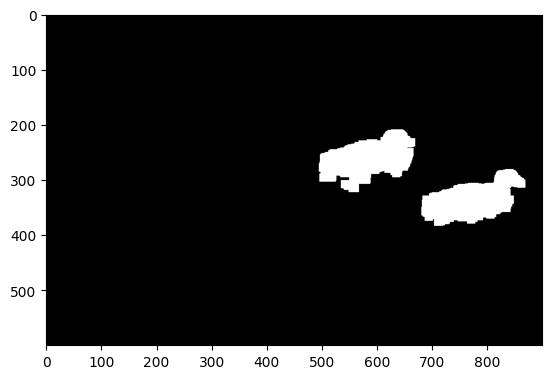

In [161]:
ret,thresh1 = cv.threshold(dilate,100,255,cv.THRESH_BINARY)
plt.imshow(thresh1, 'gray')

[  0   0   0 ... 599 599 599] [  0   1   2 ... 897 898 899]
516635


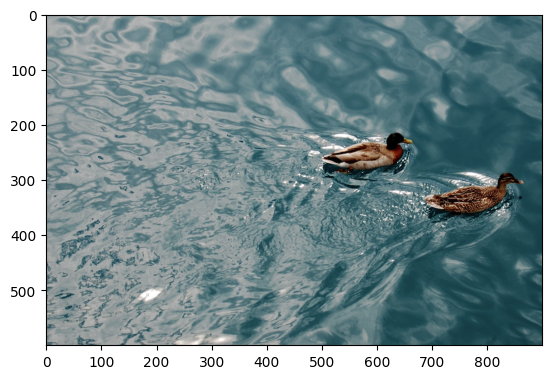

In [193]:
[indx, indy] = np.where(dilate == 0)
print(indx, indy)
print(len(indx))
#imgRgb[indx, indy] = 0
#plt.imshow(imgRgb)
plt.imshow(imgRgb)

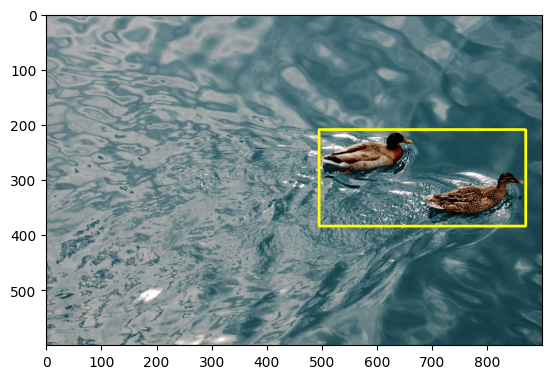

In [195]:
active_px = np.argwhere(thresh1!=0)
active_px = active_px[:,[1,0]]
x,y,w,h = cv.boundingRect(active_px)
cv.rectangle(imgRgb,(x,y),(x+w,y+h),(255,255,0),4)
plt.imshow(imgRgb, 'gray')

In [2]:
#Medir la longitud del Lapiz

In [6]:
pencil = cv.imread('imagenes/ejercicios/lapiz.png')

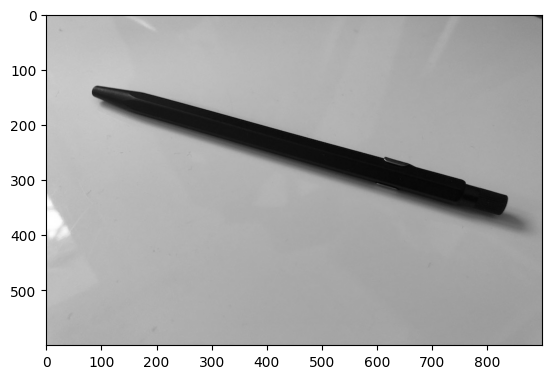

In [10]:
pencilRgb = cv.cvtColor(pencil, cv.COLOR_BGR2RGB)
pencilGray = cv.cvtColor(pencil, cv.COLOR_BGR2GRAY)
plt.imshow(pencilRgb, 'gray')

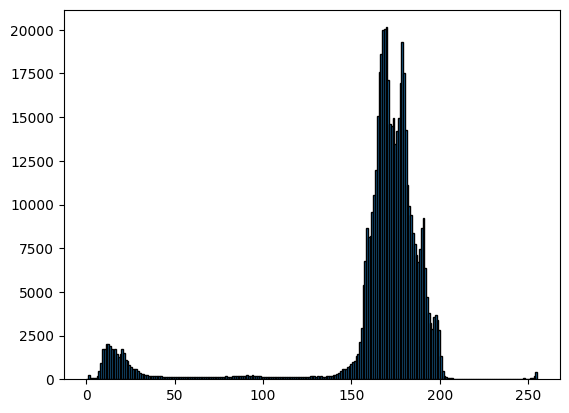

In [11]:
a,b = pencilGray.shape
datos = np.reshape(pencilGray, a * b)
plt.hist(datos, bins=256, edgecolor = 'black',  linewidth=1)
#plt.hist(h)
plt.show()

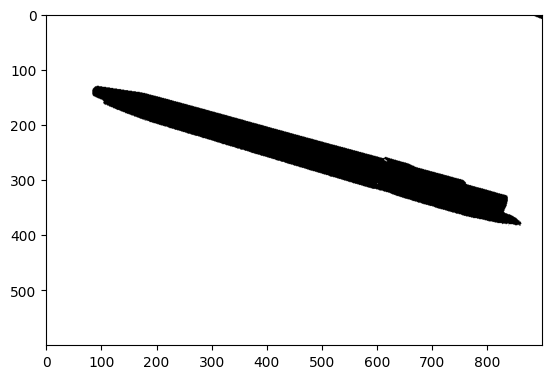

In [12]:
ret,thresh1 = cv.threshold(pencilGray,100,255,cv.THRESH_BINARY)
plt.imshow(thresh1, 'gray')

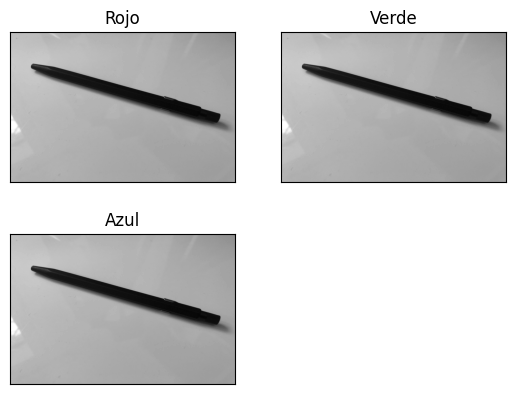

In [14]:
titles = ['Rojo','Verde', 'Azul']
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(obtenerCanaleColor(pencilRgb, i),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [62]:
def quitarSombraImagenGris(image):
    a, b = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            pixel = image[i,j]
            if pixel < 70 and i > 100 :
                image_new[i,j] = 120
    return image_new

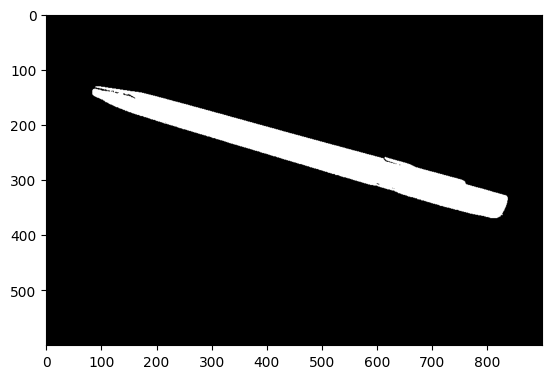

In [63]:
pencil_sin_sombra = quitarSombraImagenGris(pencilGray)
pencil_sin_sombra = np.uint8(pencil_sin_sombra)
plt.imshow(pencil_sin_sombra, 'gray')

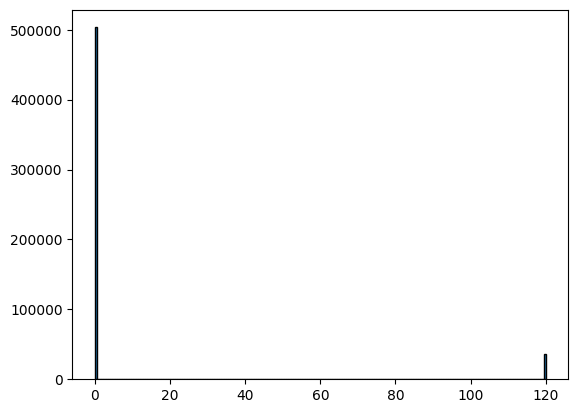

In [64]:
a,b = pencil_sin_sombra.shape
datos = np.reshape(pencil_sin_sombra, a * b)
plt.hist(datos, bins=256, edgecolor = 'black',  linewidth=1)
#plt.hist(h)
plt.show()

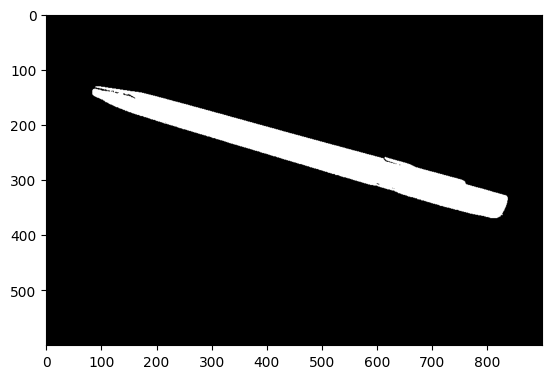

In [65]:
ret,thresh1 = cv.threshold(pencil_sin_sombra,60,255,cv.THRESH_BINARY)
plt.imshow(thresh1, 'gray')

In [83]:
active_px = np.argwhere(thresh1!=0)
punto_1 = active_px[0]
punto_2 = active_px[len(active_px) - 1]

In [84]:
# 1pixel == 0.026458 cm
numPixeles = round(np.linalg.norm(punto_1-punto_2),0)
longitud_lapiz = round(numPixeles * 0.026458,2)
print("logintud (cm)=", longitud_lapiz)

logintud (cm)= 20.27
